## Data Scientist Challenge

In this challenge you are assuming the position of a data scientist for a large corporation with offices in many states. The company you work for is looking to gain insights from its data from accross the many states that it does business over the course of the year 2014. The company runs many 'sales' over the course of the year in its states. The data you have is of the 10,000 different sales run in different states. Each sale lasts for a particular amount of time denotd by 'sale_start' and 'sale_end' columns. Along with each sale is the revenue for that particular sale.

The company is primarily interested in determining what is happening to revenue over time and what strategy should be undertaken to maximize revenue.

You don't need any advanced statistics for this assignment. Good exploration and visualizations will reveal everything you need to know about what is happening. Check out pandas time-series module documentation here - http://pandas.pydata.org/pandas-docs/stable/timeseries.html

Please fork the repository into your github profile, clone it and then start working on it locally.

In [1]:
# starter code
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv('data/sales.csv', parse_dates=['sale_start', 'sale_end'])

In [3]:
sales.head()

,state,sale_start,sale_end,sale_key,revenue
0,Arkansas,2014-12-24,2014-12-24,0,1311.0
1,Florida,2014-10-15,2014-10-17,1,698.0
2,Iowa,2014-09-07,2014-09-07,2,1193.0
3,Indiana,2014-05-19,2014-05-22,3,469.0
4,Maine,2014-04-19,2014-04-19,4,334.0


# Executive Summary
Revenue per sale is declining for each state over the course of the year. This is a surprising finding at first because average revenue and total revenue overall is increasing. The reason this occurred is because the states with high average revenue greatly increased their total number of sales as the year went on. The states that had low average revenue decreased in number of sales from the start of the year. 

This current trend may or may not necessarily indicate a problem but it certainly cannot continue indefinitely.

# Data Inspection
Get a brief summary description of the columns. From the .info method below we can see there are no null values and the dates values are already converted to datetime64 which makes it easy to apply date methods to them.

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
state         10000 non-null object
sale_start    10000 non-null datetime64[ns]
sale_end      10000 non-null datetime64[ns]
sale_key      10000 non-null int64
revenue       10000 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 390.7+ KB


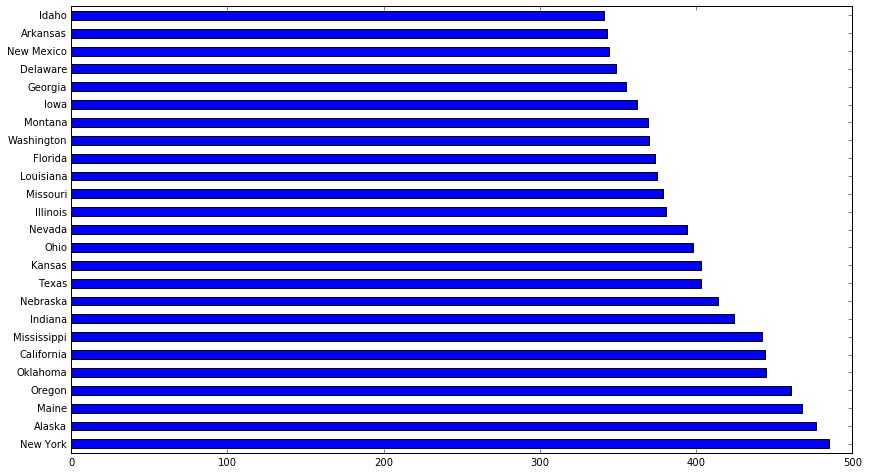

In [5]:
# Lets graph the number of sales per state
# No dominant State and all States have plenty of sales( > 300)
# If population was involved we might be able to generate more interesting statistics based on it.
sales['state'].value_counts().plot(kind='barh', figsize=(14,8));

In [6]:
# Find distribution of sales
# Very even distribution of sales. Sales last between 1 and 4 days (include start and end day)
(sales['sale_end'] - sales['sale_start']).value_counts()

3 days    2553
2 days    2507
1 days    2494
0 days    2446
dtype: int64

# Do longer number of sale days increase revenue?

In [7]:
# First lets make a new column that has length of sale
sales['sale_length'] = sales['sale_end'] - sales['sale_start']

In [8]:
# Surprisingly, the length of sale has nothing to do with the amount of revenue generated.
sales.groupby('sale_length')['revenue'].mean()

sale_length
0 days    883.903925
1 days    880.817963
2 days    894.498205
3 days    891.550725
Name: revenue, dtype: float64

# Get Overall Revenue Picture
Lets plot a scatterplot to see if there are any trends of revenue over same

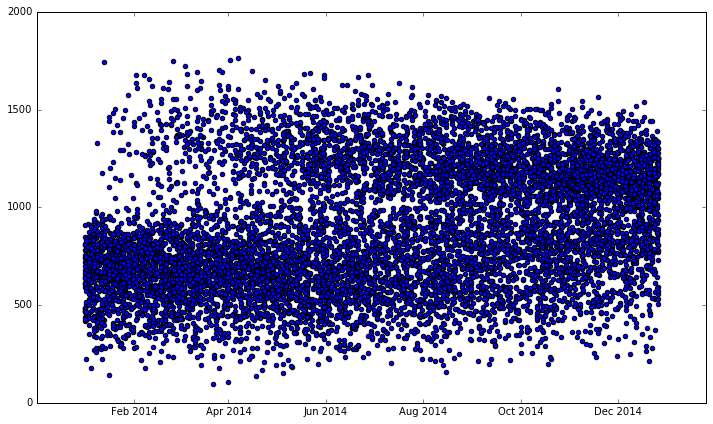

In [9]:
# Not sure what is going on but it appears there might be two groups
# One with higher revenue and another with lower revenue
plt.figure(figsize=(12,7))
plt.scatter(sales['sale_start'].values, sales['revenue'].values)

# Is revenue different by state?

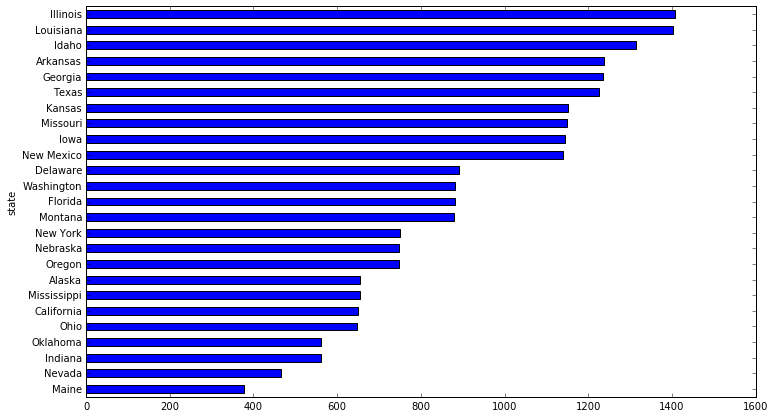

In [10]:
# There is a dramatic difference in revenue for different states. It also appears that there are 
# different groups of states that have nearly the exact same average revenue
sales.groupby('state')['revenue'].mean().sort_values().plot('barh', figsize=(12,7))

# Look at revenue over time
We will put the start date in the index column to facilitate pandas time grouping functionality

In [11]:
sales_t = sales.set_index('sale_start')
sales_t.head(10)

,state,sale_end,sale_key,revenue,sale_length
sale_start,,,,,
2014-12-24,Arkansas,2014-12-24,0,1311.0,0 days
2014-10-15,Florida,2014-10-17,1,698.0,2 days
2014-09-07,Iowa,2014-09-07,2,1193.0,0 days
2014-05-19,Indiana,2014-05-22,3,469.0,3 days
2014-04-19,Maine,2014-04-19,4,334.0,0 days
2014-12-07,Arkansas,2014-12-09,5,1200.0,2 days
2014-11-15,Idaho,2014-11-18,6,1258.0,3 days
2014-04-19,Alaska,2014-04-22,7,716.0,3 days
2014-06-27,Missouri,2014-06-29,8,1300.0,2 days


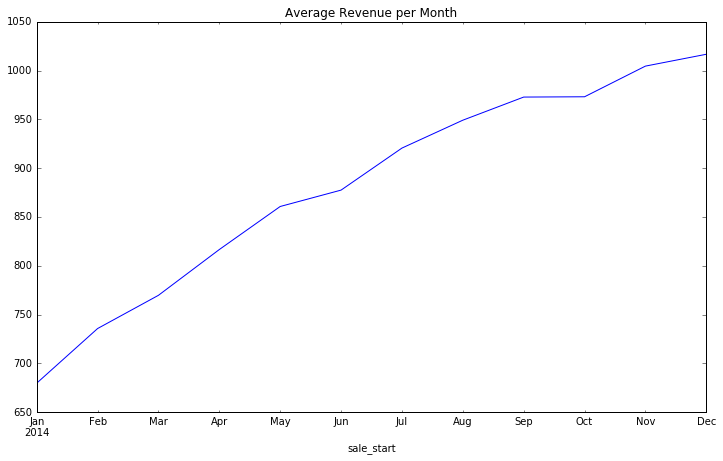

In [12]:
# Looks great. Average revenue per sale is going up. 
sales_t.resample('M')['revenue'].mean().plot(figsize=(12,7), title='Average Revenue per Month');

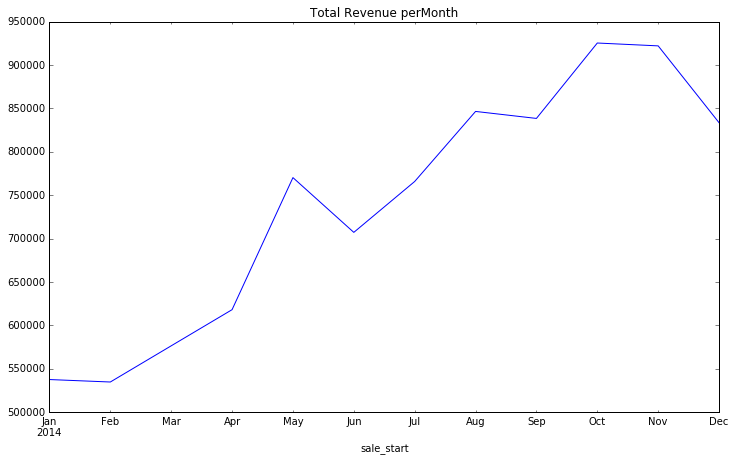

In [13]:
# But what about total revenue? Still looks good
sales_t.resample('M')['revenue'].sum().plot(figsize=(12,7), title='Total Revenue perMonth');

In [31]:
sales_state_total = sales_t.groupby('state').resample('M')['revenue'].sum()
sales_state_total = sales_state_total.reset_index()
sales_state_total.head(20)

,state,sale_start,revenue
0,Alaska,2014-01-31,46852.0
1,Alaska,2014-02-28,50926.0
2,Alaska,2014-03-31,37860.0
3,Alaska,2014-04-30,35960.0
4,Alaska,2014-05-31,34685.0
5,Alaska,2014-06-30,21115.0
6,Alaska,2014-07-31,20751.0
7,Alaska,2014-08-31,20418.0
8,Alaska,2014-09-30,15134.0
9,Alaska,2014-10-31,16373.0


# Look at total revenue by state
From plot below we can clearly see two groups. One with total revenue going up and the other going down

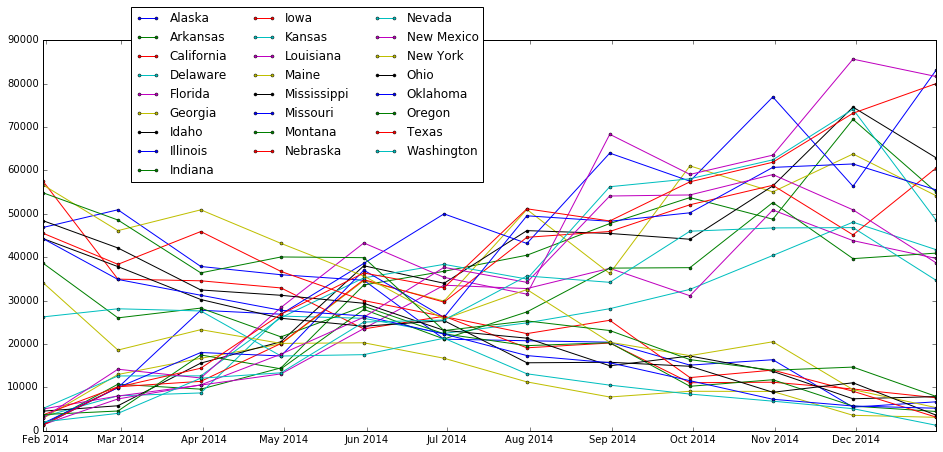

In [32]:
groups = sales_state_total.groupby('state')

fig, ax = plt.subplots(figsize=(16,7))
for name, group in groups:
    ax.plot(group['sale_start'], group['revenue'], marker='o', ms=3, label=name)
ax.legend(bbox_to_anchor=(.5,1.1),ncol=3);

# Look at average revenue by state
This plot looks even more interesting. All of the states have decreasing average revenue over time. This is quite bad. Perhaps, marketshare is being gained by sacrificing the price of sales.

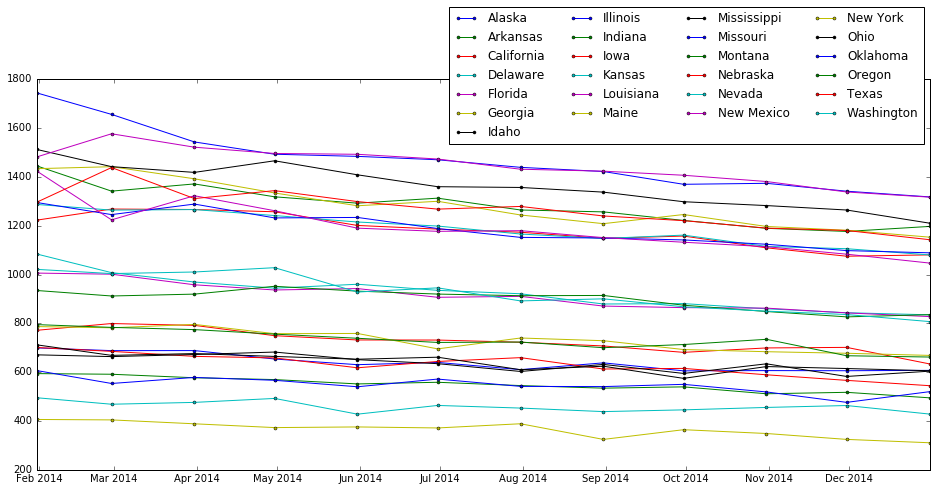

In [33]:
sales_state_avg = sales_t.groupby('state').resample('M')['revenue'].mean()
sales_state_avg = sales_state.reset_index()

groups = sales_state_avg.groupby('state')

fig, ax = plt.subplots(figsize=(16,7))
for name, group in groups:
    ax.plot(group['sale_start'], group['revenue'], marker='o', ms=3, label=name)
ax.legend(bbox_to_anchor=(1,1.2),ncol=4);

# Why are revenue and average sales per revenue rising overall but every state is seeing a decline in average revenue?
Lets split the states into groups that have total revenue increasing and those with total revenue decreasing over the year

In [43]:
# pivot the table to easily compare first and last month sales
sales_pivot = sales_state_total.pivot(index='state', columns='sale_start')
sales_pivot

revenue                                                         \
sale_start  2014-01-31 2014-02-28 2014-03-31 2014-04-30 2014-05-31 2014-06-30   
state                                                                           
Alaska         46852.0    50926.0    37860.0    35960.0    34685.0    21115.0   
Arkansas        1445.0    10732.0     9597.0    14501.0    33597.0    36756.0   
California     57488.0    34943.0    34562.0    32918.0    23480.0    26395.0   
Delaware        3252.0     8061.0     8723.0    26431.0    25922.0    22443.0   
Florida         5029.0     8010.0    10537.0    13113.0    23559.0    33545.0   
Georgia         2867.0    12975.0    16705.0    20010.0    34602.0    29898.0   
Idaho           4537.0     5767.0    15601.0    20521.0    38025.0    33992.0   
Illinois        1744.0     9935.0    27774.0    26868.0    38581.0    49981.0   
Indiana        38614.0    26023.0    28274.0    21643.0    28692.0    22341.0   
Iowa            3668.0    10145.0    11396.0    20112.0    34826.0    29650.0   
Kansas          5148.0    12638.0    12660.0    26072.0    35236.0    38352.0   
Louisiana       2963.0    14188.0    12172.0    28420.0    43279.0    35353.0   
Maine          34122.0    18603.0    23307.0    20137.0    20282.0    16715.0   
Mississippi    48410.0    42128.0    32452.0    31225.0    29383.0    23143.0   
Missouri        1295.0     9963.0    18039.0    17245.0    37012.0    26141.0   
Montana         3738.0     4560.0    17473.0    14276.0    27956.0    21156.0   
Nebraska       45514.0    38359.0    45913.0    36721.0    30006.0    26334.0   
Nevada         26245.0    28115.0    27616.0    17232.0    17545.0    21328.0   
New Mexico      1424.0     7343.0    10581.0    17658.0    26177.0    37659.0   
New York       56641.0    46122.0    50917.0    43186.0    35651.0    25727.0   
Ohio           44284.0    37831.0    30251.0    25928.0    24094.0    25390.0   
Oklahoma       44276.0    34877.0    31233.0    27764.0    26468.0    22295.0   
Oregon         54839.0    48568.0    36390.0    40054.0    39894.0    23095.0   
Texas           1296.0    10067.0    14421.0    26871.0    36363.0    32964.0   
Washington      2042.0     4015.0    12123.0    13363.0    25061.0    25524.0   

                                                                               
sale_start  2014-07-31 2014-08-31 2014-09-30 2014-10-31 2014-11-30 2014-12-31  
state                                                                          
Alaska         20751.0    20418.0    15134.0    16373.0     5453.0     6680.0  
Arkansas       40456.0    47748.0    53743.0    48758.0    71756.0    55059.0  
California     19124.0    20223.0    11076.0    11195.0     9628.0     7624.0  
Delaware       24870.0    28133.0    32588.0    40397.0    48074.0    41745.0  
Florida        32775.0    37439.0    31116.0    50874.0    43820.0    39728.0  
Georgia        50998.0    36247.0    61039.0    55053.0    63785.0    54191.0  
Idaho          46123.0    45472.0    44136.0    56423.0    74586.0    62937.0  
Illinois       43168.0    63983.0    57519.0    76918.0    56330.0    83028.0  
Indiana        19619.0    20309.0    10255.0    11764.0     5691.0     4454.0  
Iowa           44582.0    45929.0    52084.0    56572.0    45146.0    60501.0  
Kansas         34974.0    56236.0    58067.0    62439.0    74081.0    48607.0  
Louisiana      31487.0    68318.0    59075.0    63520.0    85634.0    81647.0  
Maine          11270.0     7788.0     9107.0     9066.0     3570.0     3108.0  
Mississippi    21348.0    14983.0    17236.0    13704.0     7378.0     7875.0  
Missouri       49538.0    48278.0    50231.0    60692.0    61483.0    55531.0  
Montana        27394.0    37482.0    37590.0    52601.0    39670.0    40936.0  
Nebraska       22396.0    25463.0    12260.0    13984.0     9119.0     3169.0  
Nevada         13133.0    10521.0     8465.0     6832.0     5096.0     1285.0  
New Mexico     34206.0    54100.0    54344.0    59038.0    50911.0

In [45]:
# get series of states. 1 if revenue went up 0 if down
states_up_data = sales_pivot.apply(lambda x: (x[0] < x[-1]) * 1, axis=1)
states_up_data

state
Alaska         0
Arkansas       1
California     0
Delaware       1
Florida        1
Georgia        1
Idaho          1
Illinois       1
Indiana        0
Iowa           1
Kansas         1
Louisiana      1
Maine          0
Mississippi    0
Missouri       1
Montana        1
Nebraska       0
Nevada         0
New Mexico     1
New York       0
Ohio           0
Oklahoma       0
Oregon         0
Texas          1
Washington     1
dtype: int64

# Look at average revenue for states where revenue went up vs those that went down

In [47]:
states_up = states_up_data[states_up_data == 1].index.values
states_up

array(['Arkansas', 'Delaware', 'Florida', 'Georgia', 'Idaho', 'Illinois',
       'Iowa', 'Kansas', 'Louisiana', 'Missouri', 'Montana', 'New Mexico',
       'Texas', 'Washington'], dtype=object)

In [55]:
# add to original data whether state was an up/down state
sales['up'] = 1 * (sales['state'].isin(states_up))

In [56]:
sales.head(15)

,state,sale_start,sale_end,sale_key,revenue,sale_length,up
0,Arkansas,2014-12-24,2014-12-24,0,1311.0,0 days,1
1,Florida,2014-10-15,2014-10-17,1,698.0,2 days,1
2,Iowa,2014-09-07,2014-09-07,2,1193.0,0 days,1
3,Indiana,2014-05-19,2014-05-22,3,469.0,3 days,0
4,Maine,2014-04-19,2014-04-19,4,334.0,0 days,0
5,Arkansas,2014-12-07,2014-12-09,5,1200.0,2 days,1
6,Idaho,2014-11-15,2014-11-18,6,1258.0,3 days,1
7,Alaska,2014-04-19,2014-04-22,7,716.0,3 days,0
8,Missouri,2014-06-27,2014-06-29,8,1300.0,2 days,1
9,Maine,2014-04-08,2014-04-09,9,260.0,1 days,0


# Very revealing plot of up revenue vs down revenue states
From the plot below we see that the states that had total revenue go up had about twice as high average revenue for the year.

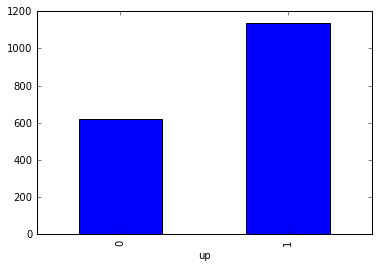

In [134]:
sales.groupby('up')['revenue'].mean().plot('bar');

In [130]:
sales_group_count = sales.set_index('sale_start').groupby('up').resample('6MS')['revenue'].count()
sales_group_count

up  sale_start
0   2014-01-01    3437
    2014-07-01    1415
1   2014-01-01    1288
    2014-07-01    3860
Name: revenue, dtype: int64

# Look at the number of sales from the first half of the year vs the last half
When comparing the up and down revenue groups we see a dramatic difference in the number of sales that occurred for each group. Group 0, the group that had total revenue go down, was the predominant group in the first half of the year. This completely switched in the second half of the year when Group 1 became the predominant group.

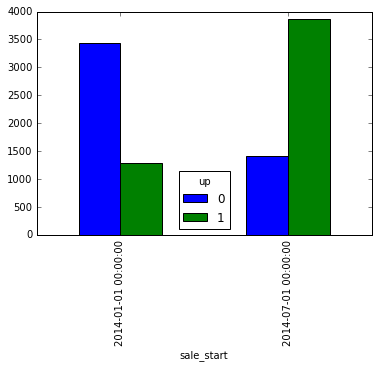

In [136]:
sales_group_count.unstack('up').plot.bar();

# Conclusion
Revenue per sale is declining for each state over the course of the year. This is a surprising finding at first because average revenue and total revenue overall is increasing. The reason this occurred is because high average revenue states greatly increased their number of sales as the year went on. The states that had low average revenue decreased in number of sales from the start of the year. 

Is this good or bad? Probably too difficult to tell without more information but it is troublesome that every single state had it's average revenue per sale decline. One this is for sure, this trend cannot continue indefinitely.